# Numerical Integration -- RK4

[RK4 method](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods) has been applied to force free symmetric and asymmetric top cases. Click [here](https://github.com/ejwest2/Rotation/blob/master/force-free-rk4-spherical-top.ipynb) to see the spherical top case. Here are [some useful notes](https://www.calvin.edu/~scofield/courses/m231/materials/rungeKuttaFormulas.pdf) on multi-variable RK4 method.

--------------------------------

## Sanity checks for force-free motion (no external torque)

Symmetric top ($I_{1}=I_{2} \neq I_{3}$)

- rotate about x-, y-, or z-axes (in the space frame) --> steady rotation? __YES__
- rotate about random axis in xy-plane --> steady rotation? __YES__
- rotate about random axis out of xy-plane --> precession about z-axis (oscillation in $\omega_{1}$ and $\omega_{2}$, but steady motion for $\omega_{3}$)? __YES?__

Asymmetric top ($I_{1} < I_{2} < I_{3}$)

- rotate about x-, y-, or z-axes (in the space frame) --> steady rotation? __YES__
- rotate about axis near z-axis (major axis) --> sinusoidal oscillation in $\omega_{1}$ and $\omega_{2}$, no oscillation in $\omega_{3}$?
- rotate about axis near x-axis (minor axis) --> sinusoidal oscillation in $\omega_{2}$ and $\omega_{3}$, no oscillation in $\omega_{1}$?
- rotate about axis near y-axis (intermediate axis) --> non-sinusoidal oscillation in all three $\omega$'s (occasional "flip" of precession axis, ala eraser toss)

## Notes

- The difficulty was, again, to select appropriate $\omega$'s and time steps.
- I was able to observe sinusoidal behaviors, but more rigorous tests are needed here. (any suggestions?)

## Current/future works
- Calculate the gravitational potential due to a given ellipsoid numerically and and then visualize (calculate both inside and outside the ellipsoid, plot as a 3D vector field using quiver or equipotentials using contour surfaces)



-------------------------------------

## Non-spherical tops - force free

When there is no external torque, Euler's equations of motion for a general rigid body simplifies to

\begin{align}
  & I_{1}\dot{\omega}_{1} - (I_{2} - I_{3})\omega_{2}\omega_{3} = 0 \\
  & I_{2}\dot{\omega}_{2} - (I_{3} - I_{1})\omega_{3}\omega_{1} = 0 \\
  & I_{3}\dot{\omega}_{3} - (I_{1} - I_{2})\omega_{1}\omega_{2} = 0
\end{align}

Solving these equations yields the evolution of the rotation vector $\vec{\omega}$ in the body frame.

The force-free version of Euler's equations become

\begin{align}
  & \frac{d\omega_{1}}{dt} = f_{1}(\omega_{2}, \omega_{3}) \\
  & \frac{d\omega_{2}}{dt} = f_{2}(\omega_{1}, \omega_{3}) \\
  & \frac{d\omega_{3}}{dt} = f_{3}(\omega_{1}, \omega_{2})
\end{align}

where

\begin{align}
  & f_{1}(\omega_{2}, \omega_{3} \: ;t) = \frac{(I_{2} - I_{3})}{I_{1}}\omega_{2}\omega_{3} \\
  & f_{2}(\omega_{1}, \omega_{3} \: ;t) = \frac{(I_{3} - I_{1})}{I_{2}}\omega_{3}\omega_{1} \\
  & f_{3}(\omega_{1}, \omega_{2} \: ;t) = \frac{(I_{1} - I_{2})}{I_{3}}\omega_{1}\omega_{2}
\end{align}

Then we solve these equations using a standard numerical integrator, for example 4th-order Runge-Kutta.

Also, similar to the spherical top cases, the components of $\vec{\omega}$ in the body frame are related to the Euler angles by

\begin{align}
  & f_{\phi}\:(\theta, \psi, \omega_1, \omega_2 \: ;t) = \omega_{1}\csc{\theta}\sin{\psi} + \omega_{2}\csc{\theta}\cos{\psi} \\ 
  & f_{\theta}\:(\psi, \omega_1, \omega_2 \: ;t) = \omega_{1}\cos{\psi} - \omega_{2}\sin{\psi} \\
  & f_{\psi}\:(\theta, \psi, \omega_1, \omega_2, \omega_{3} \: ;t) = -\omega_{1}\cot{\theta}\sin{\psi} - \omega_{2}\cot{\theta}\cos{\psi} + \omega_{3}
\end{align}

Note that now $\omega_1$, $\omega_2$, $\omega_3$ must be included in the numerical methods.

-----------------------

## Numerical method -- RK4
Now, we apply the RK4 numerical method at each time step to update the Euler angles.

\begin{align}
  & \omega_1^{n+1} = \omega_1^n + \frac{\Delta{t}}{2}\left(fk_{n1}+2fk_{n2}+2fk_{n3}+fk_{n4}\right) \\
  & \omega_2^{n+1} = \omega_2^n + \frac{\Delta{t}}{2}\left(fl_{n1}+2fl_{n2}+2fl_{n3}+fl_{n4}\right) \\
  & \omega_3^{n+1} = \omega_3^n + \frac{\Delta{t}}{2}\left(fm_{n1}+2fm_{n2}+2fm_{n3}+fm_{n4}\right) \\
  & \phi^{n+1} = \phi^n + \frac{\Delta{t}}{2}\left(k_{n1}+2k_{n2}+2k_{n3}+k_{n4}\right) \\
  & \theta^{n+1} = \theta^n + \frac{\Delta{t}}{2}\left(l_{n1}+2l_{n2}+2l_{n3}+l_{n4}\right) \\
  & \psi^{n+1} = \psi^n + \frac{\Delta{t}}{2}\left(m_{n1}+2m_{n2}+2m_{n3}+m_{n4}\right)
\end{align}

where

\begin{align}
  & fk_{n1} = f_1\left(\omega_2^n, \: \omega_3^n\right) \\
  & fl_{n1} = f_2\left(\omega_1^n, \: \omega_3^n\right) \\
  & fm_{n1} = f_3\left(\omega_1^n, \: \omega_2^n\right) \\
  & fk_{n2} = f_1\left(\omega_2^n+\frac{\Delta{t}}{2}fl_{n1}, \: \omega_3^n+\frac{\Delta{t}}{2}fm_{n1}\right) \\
  & fl_{n2} = f_2\left(\omega_1^n+\frac{\Delta{t}}{2}fk_{n1}, \: \omega_3^n+\frac{\Delta{t}}{2}fm_{n1}\right) \\
  & fm_{n2} = f_3\left(\omega_1^n+\frac{\Delta{t}}{2}fk_{n1}, \: \omega_2^n+\frac{\Delta{t}}{2}fl_{n1}\right) \\
  & fk_{n3} = f_1\left(\omega_2^n+\frac{\Delta{t}}{2}fl_{n2}, \: \omega_3^n+\frac{\Delta{t}}{2}fm_{n2}\right) \\
  & fl_{n3} = f_2\left(\omega_1^n+\frac{\Delta{t}}{2}fk_{n2}, \: \omega_3^n+\frac{\Delta{t}}{2}fm_{n2}\right) \\
  & fm_{n3} = f_3\left(\omega_1^n+\frac{\Delta{t}}{2}fk_{n2}, \: \omega_2^n+\frac{\Delta{t}}{2}fl_{n2}\right) \\
  & fk_{n4} = f_1\left(\omega_2^n+\Delta{t}\:fl_{n3}, \: \omega_3^n+\Delta{t}\:fm_{n2}\right) \\
  & fl_{n4} = f_2\left(\omega_1^n+\Delta{t}\:fk_{n3}, \: \omega_3^n+\Delta{t}\:fm_{n2}\right) \\
  & fm_{n4} = f_3\left(\omega_1^n+\Delta{t}\:fk_{n3}, \: \omega_2^n+\Delta{t}\:fl_{n2}\right) \\
  & k_{n1} = f_\phi\left(\theta^n, \: \psi^n, \: \omega_1^n, \: \omega_2^n\right) \\
  & l_{n1} = f_\theta\left(\psi^n, \: \omega_1^n, \: \omega_2^n\right) \\
  & m_{n1} = f_\psi\left(\theta^n, \: \psi^n, \: \omega_1^n, \: \omega_2^n\right) \\
  & k_{n2} = f_\phi\left(\theta^n+\frac{\Delta{t}}{2}l_{n1}, \: \psi^n+\frac{\Delta{t}}{2}m_{n1}, \: \omega_1^n+\frac{\Delta{t}}{2}fk_{n1}, \: \omega_2^n+\frac{\Delta{t}}{2}fl_{n1}\right) \\
  & l_{n2} = f_\theta\left(\psi^n+\frac{\Delta{t}}{2}m_{n1}, \: \omega_1^n+\frac{\Delta{t}}{2}fk_{n1}, \: \omega_2^n+\frac{\Delta{t}}{2}fl_{n1}\right) \\
  & m_{n2} = f_\psi\left(\theta^n+\frac{\Delta{t}}{2}l_{n1}, \: \psi^n+\frac{\Delta{t}}{2}m_{n1}, \: \omega_1^n+\frac{\Delta{t}}{2}fk_{n1}, \: \omega_2^n+\frac{\Delta{t}}{2}fl_{n1}\right) \\
  & k_{n3} = f_\phi\left(\theta^n+\frac{\Delta{t}}{2}l_{n2}, \: \psi^n+\frac{\Delta{t}}{2}m_{n2}, \: \omega_1^n+\frac{\Delta{t}}{2}fk_{n1}, \: \omega_2^n+\frac{\Delta{t}}{2}fl_{n1}\right) \\
  & l_{n3} = f_\theta\left(\psi^n+\frac{\Delta{t}}{2}m_{n2}, \: \omega_1^n+\frac{\Delta{t}}{2}fk_{n2}, \: \omega_2^n+\frac{\Delta{t}}{2}fl_{n2}\right) \\
  & m_{n3} = f_\psi\left(\theta^n+\frac{\Delta{t}}l_{n2}, \: \psi^n+\frac{\Delta{t}}{2}m_{n2}, \: \omega_1^n+\frac{\Delta{t}}{2}fk_{n2}, \: \omega_2^n+\frac{\Delta{t}}{2}fl_{n2}\right) \\
  & k_{n4} = f_\phi\left(\theta^n+\Delta{t}\:l_{n3}, \: \psi^n+\Delta{t}\:m_{n3}, \: \omega_1^n+\Delta{t}\:fk_{n3}, \: \omega_2^n+\Delta{t}\:fl_{n2}\right) \\
  & l_{n4} = f_\theta\left(\psi^n+\Delta{t}\:m_{n3}, \: \omega_1^n+\Delta{t}\:fk_{n3}, \: \omega_2^n+\Delta{t}\:fl_{n2}\right) \\
  & m_{n4} = f_\psi\left(\theta^n+\Delta{t}\:l_{n3}, \: \psi^n+\Delta{t}\:m_{n3}, \: \omega_1^n+\Delta{t}\:fk_{n3}, \: \omega_2^n+\Delta{t}\:fl_{n2}\right)
\end{align}

In [62]:
%matplotlib notebook
import math
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

In [78]:
# main parameters

# here the radius R, and I are arbirtrary
R = 10  
I1 = 120
I2 = 120
I3 = 170
Np = 100   # number of points

# initalization
Omega1 = np.zeros(Np)
Omega2 = np.zeros(Np)
Omega3 = np.zeros(Np)
Omega1[0] = 0.011
Omega2[0] = 0.007
Omega3[0] = 0.017
Phi = np.zeros(Np)
Theta = np.zeros(Np)
Psi = np.zeros(Np)
Phi[0] = 0
Theta[0] = 0.00001   # the expression doesnt allow the initial theta to be zero
Psi[0] = 0

# technically we only need dt
t = np.linspace(0, 20*2*np.pi, Np)
dt = t[1]-t[0]

In [79]:
# other parameters
#tilt = 23.5*np.pi/180   # tilt angle

# meshgrids
lat0 = np.linspace(0, np.pi, Np)
lon0 = np.linspace(0, 2*np.pi, Np)
lat, lon = np.meshgrid(lat0, lon0)

# initial x,y,z
x0 = R*np.sin(lat)*np.cos(lon)
y0 = R*np.sin(lat)*np.sin(lon)
z0 = R*np.cos(lat)

# default axis
p0 = np.array([0, 0, R])
#p0, x0, y0, z0 = evolve(0, tilt, 0)

In [80]:
# updates the meshgrids using the rotation matix at each step
def evolve(phi, theta, psi):
    
    # rotation matrix -- euler angles
    rotMat = np.array([[np.cos(psi)*np.cos(phi)-np.cos(theta)*np.sin(phi)*np.sin(psi), np.cos(psi)*np.sin(phi)+np.cos(theta)*np.cos(phi)*np.sin(psi), np.sin(psi)*np.sin(theta)], \
                    [-np.sin(psi)*np.cos(phi)-np.cos(theta)*np.sin(phi)*np.cos(psi), -np.sin(psi)*np.sin(phi)+np.cos(theta)*np.cos(phi)*np.cos(psi), np.cos(psi)*np.sin(theta)], \
                    [np.sin(theta)*np.sin(phi), -np.sin(theta)*np.cos(phi), np.cos(theta)]])
    
    # rotate meshgrid
    xNew = np.zeros([Np,Np])
    yNew = np.zeros([Np,Np])
    zNew = np.zeros([Np,Np])
    for i in range(Np):
        for j in range(Np):
            xNew[i,j] = rotMat[0,0]*x0[i,j] + rotMat[0,1]*y0[i,j] + rotMat[0,2]*z0[i,j]
            yNew[i,j] = rotMat[1,0]*x0[i,j] + rotMat[1,1]*y0[i,j] + rotMat[1,2]*z0[i,j]
            zNew[i,j] = rotMat[2,0]*x0[i,j] + rotMat[2,1]*y0[i,j] + rotMat[2,2]*z0[i,j]
    
    # rotate axis
    pNew = np.dot(rotMat, p0)
    
    return pNew, xNew, yNew, zNew

In [81]:
def plotSphere(p, x, y, z):
    
    # evolve grids
    ax0.set_xlim(-1.3*R, 1.3*R)
    ax0.set_ylim(-1.3*R, 1.3*R)
    ax0.set_zlim(-1.3*R, 1.3*R)
    
    # highlighted strip to see the rotation/spin more easily
    N0 = int(Np/20)
    ax0.plot_surface(x[N0:], y[N0:], z[N0:], color='lightskyblue', alpha=0.8)
    ax0.plot_surface(x[:N0+1], y[:N0+1], z[:N0+1], color='mediumseagreen', alpha=0.8)

    # evolve axis
    ax0.plot([-1.3*p[0],-p[0]], [-1.3*p[1],-p[1]], [-1.3*p[2],-p[2]], color='darkgreen', linewidth=1)
    ax0.plot([-p[0],p[0]], [-p[1],p[1]], [-p[2],p[2]], color='darkgreen', linestyle='--', linewidth=1)
    ax0.plot([p[0],1.3*p[0]], [p[1],1.3*p[1]], [p[2],1.3*p[2]], color='darkgreen', linewidth=1)

    ax0.set_xlabel('x', fontsize=13)
    ax0.set_ylabel('y', fontsize=13)
    ax0.set_zlabel('z', fontsize=13)  
    fig0.suptitle('initial $\omega_1$=' + str(Omega1[0]) + ', $\omega_2$=' + str(Omega2[0]) + ', $\omega_3$=' + str(Omega3[0]), fontsize=15) 
    
    return        

In [82]:
# omegas, phi, theta, psi functions
def fOmega1(omega2, omega3):
    newOmega10 = (I2-I3)/I1 *omega2*omega3
    return newOmega10

def fOmega2(omega1, omega3):
    newOmega20 = (I3-I1)/I2 *omega1*omega3
    return newOmega20

def fOmega3(omega1, omega2):
    newOmega20 = (I1-I2)/I3 *omega1*omega2
    return newOmega20

def fPhi(theta, psi, omega1, omega2):
    newPhi0 = 1/np.sin(theta)*(omega1*np.sin(psi) + omega2*np.cos(psi))
    return newPhi0
    
def fTheta(psi, omega1, omega2):
    newTheta0 = omega1*np.cos(psi) - omega2*np.sin(psi)
    return newTheta0

def fPsi(theta, psi, omega1, omega2, omega3):
    newPsi0 = -1/np.tan(theta)*(omega1*np.sin(psi) + omega2*np.cos(psi)) + omega3
    return newPsi0    

In [83]:
# RK4 method

def rk4():
    
    # calculate using different slopes
    fk1 = fOmega1(omega2, omega3)
    fl1 = fOmega2(omega1, omega3)
    fm1 = fOmega3(omega1, omega2)
    
    fk2 = fOmega1(omega2 + dt/2*fl1, omega3 + dt/2*fm1)
    fl2 = fOmega2(omega1 + dt/2*fk1, omega3 + dt/2*fm1)
    fm2 = fOmega3(omega1 + dt/2*fm1, omega2 + dt/2*fl1)
    
    fk3 = fOmega1(omega2 + dt/2*fl2, omega3 + dt/2*fm2)
    fl3 = fOmega2(omega1 + dt/2*fk2, omega3 + dt/2*fm2)
    fm3 = fOmega3(omega1 + dt/2*fm2, omega2 + dt/2*fl2)    
    
    fk4 = fOmega1(omega2 + dt*fl3, omega3 + dt*fm3)
    fl4 = fOmega2(omega1 + dt*fk3, omega3 + dt*fm3)  
    fm4 = fOmega2(omega1 + dt*fk3, omega2 + dt*fl3) 
    
    k1 = fPhi(theta, psi, omega1, omega2)
    l1 = fTheta(psi, omega1, omega2)
    m1 = fPsi(theta, psi, omega1, omega2, omega3)

    k2 = fPhi(theta+dt/2*l1, psi+dt/2*m1, omega1+dt/2*fk1, omega2+dt/2*fl1)
    l2 = fTheta(psi+dt/2*m1, omega1+dt/2*fk1, omega2+dt/2*fl1)
    m2 = fPsi(theta+dt/2*l1, psi+dt/2*m1, omega1+dt/2*fk1, omega2+dt/2*fl1, omega3 + dt/2*fm1)
    
    k3 = fPhi(theta+dt/2*l2, psi+dt/2*m2, omega1+dt/2*fk2, omega2+dt/2*fl2)
    l3 = fTheta(psi+dt/2*m2, omega1+dt/2*fk2, omega2+dt/2*fl2)
    m3 = fPsi(theta+dt/2*l2, psi+dt/2*m2, omega1+dt/2*fk2, omega2+dt/2*fl2, omega3 + dt/2*fm2)

    k4 = fPhi(theta+dt*l3, psi+dt*m3, omega1+dt*fk3, omega2+dt*fl3)
    l4 = fTheta(psi+dt*m3, omega1+dt*fk3, omega2+dt*fl3)
    m4 = fPsi(theta+dt*l3, psi+dt*m3, omega1+dt*fk3, omega2+dt*fl3, omega3 + dt*fm3)
    
    # now average them
    newOmega1 = omega1 + dt/6*(fk1 + 2*fk2 + 2*fk3 + fk4)
    newOmega2 = omega2 + dt/6*(fl1 + 2*fl2 + 2*fl3 + fl4)  
    newOmega3 = omega3 + dt/6*(fm1 + 2*fm2 + 2*fm3 + fm4)     
    
    newPhi = phi + dt/6*(k1 + 2*k2 + 2*k3 + k4)
    newTheta = theta + dt/6*(l1 + 2*l2 + 2*l3 + l4)
    newPsi = psi + dt/6*(m1 + 2*m2 + 2*m3 + m4)
    
    return newOmega1, newOmega2, newOmega3, newPhi, newTheta, newPsi

In [84]:
# evolve with time

for n in range(Np-1):   # notice Np-1 due to the nature of the RK4 method
    
    omega1 = Omega1[n]
    omega2 = Omega2[n]
    omega3 = Omega3[n]
    phi = Phi[n]
    theta = Theta[n]
    psi = Psi[n]
    
    newOmega1, newOmega2, newOmega3, newPhi, newTheta, newPsi = rk4()
    
    Omega1[n+1] = newOmega1
    Omega2[n+1] = newOmega2
    Omega3[n+1] = newOmega3
    Phi[n+1] = newPhi
    Theta[n+1] = newTheta
    Psi[n+1] = newPsi   

<IPython.core.display.Javascript object>


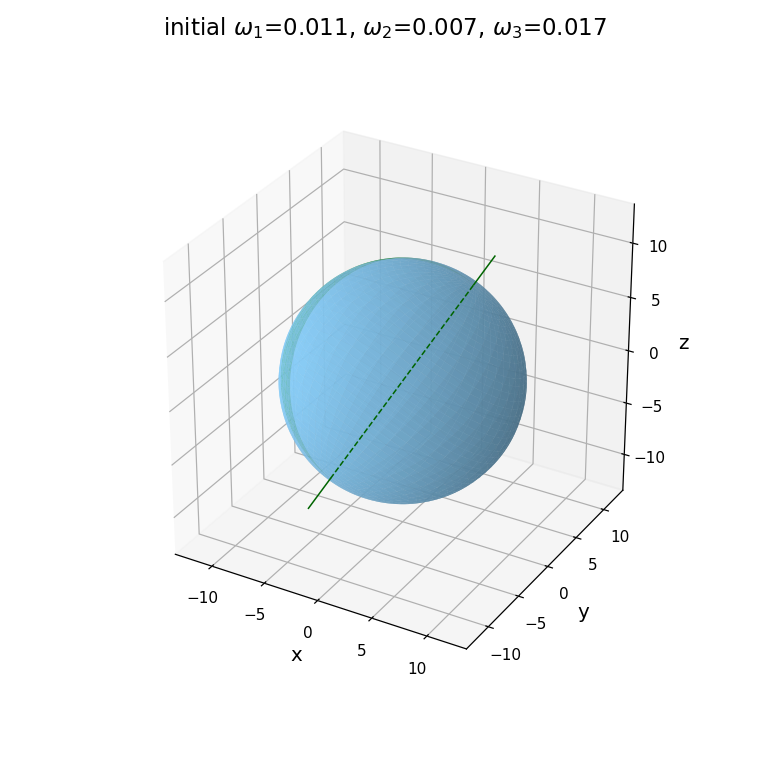

<IPython.core.display.Javascript object>


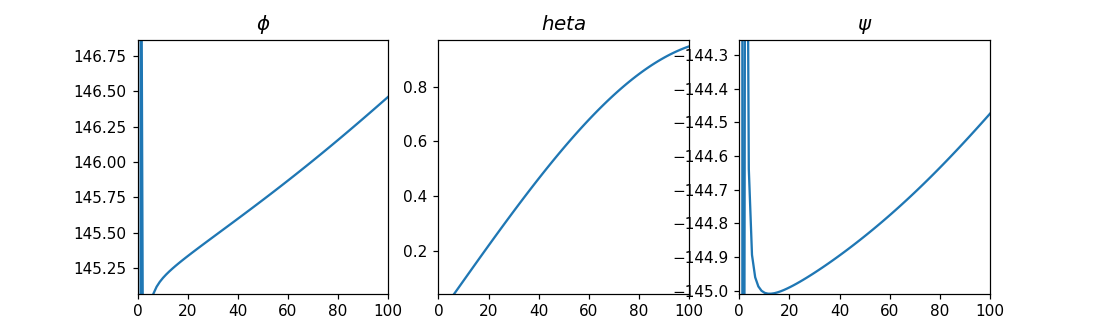

<IPython.core.display.Javascript object>


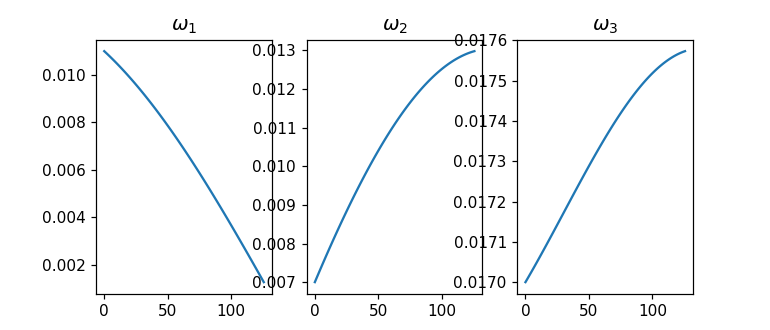

In [85]:
# prepare a figure
fig0 = plt.figure(figsize=(7,7))
ax0 =fig0.add_subplot(111, projection='3d')
fig0.suptitle('initial $\omega_1$=' + str(Omega1[0]) + ', $\omega_2$=' + str(Omega2[0]) + ', $\omega_3$=' + str(Omega3[0]), fontsize=15) 

for n in range(Np):
    
    # evolve
    p, x, y, z = evolve(Phi[n], Theta[n], Psi[n])
    
    # update figure
    ax0.clear()
    plotSphere(p, x, y, z)
    fig0.canvas.draw()
    
# fig1 shows euler angles

fig1 = plt.figure(figsize=(10,3))
ax0 =fig1.add_subplot(131)
ax0.set_xlim(0,Np)
ax0.set_ylim(min(Phi[5:]), max(Phi[5:]))
plt.title('$\phi$', fontsize=13)
ax1 =fig1.add_subplot(132)
ax1.set_xlim(0,Np)
ax1.set_ylim(min(Theta[5:]), max(Theta[5:]))
plt.title('$\theta$', fontsize=13)
ax2 =fig1.add_subplot(133)
ax2.set_xlim(0,Np)
ax2.set_ylim(min(Psi[5:]), max(Psi[5:]))
plt.title('$\psi$', fontsize=13)

ax0.plot(t,Phi)
ax1.plot(t,Theta)
ax2.plot(t,Psi)

# fig2 shows euler angles

fig2 = plt.figure(figsize=(7,3))
ax3 =fig2.add_subplot(131)
plt.title('$\omega_1$', fontsize=13)
ax4 =fig2.add_subplot(132)
plt.title('$\omega_2$', fontsize=13)
ax5 =fig2.add_subplot(133)
plt.title('$\omega_3$', fontsize=13)

ax3.plot(t,Omega1)
ax4.plot(t,Omega2)
ax5.plot(t,Omega3)

In [61]:
min(Phi[5:]), max(Phi[5:])

(44.94213142045835, 47.38454368965638)